In [1]:
# 输入数据的参数
_INPUT1='{"name":"input1","type":0,"uri":"tmp_84098fc7c729474f84c39d2bada1b6b3"}'
_INPUT3='{"name":"input3","type":0,"uri":"tmp_fe0a5c6c95784c9bbe100405cdcd9531"}'
_INPUT2='{"name":"input2","type":0,"uri":"tmp_a3c5f92fc5284dd39b37979487c5ba5b"}'

# 输出数据的参数
_OUTPUT='[{"name":"output1","type":0,"uri":"tmp_0c1c2fc227994059b61100a6088337fc"},{"name":"output2","type":0,"uri":"tmp_45933c6af75c41818444f8940cc25d20"},{"name":"output3","type":0,"uri":"tmp_a343e42388414e438884b743168d6af9"},{"name":"output4","type":0,"uri":"tmp_217fcc3e544c4499be97552b160c186a"}]'

# 自定义参数


In [2]:
# 引入使用库
import pandas as pd
#from ustciscrLab import get_score
from ustciscrLab_A import get_score
import wfio
import random
import numpy as np
import matplotlib.pyplot as plt
import pylab as plot

In [3]:
# 使用第三方库使用 !pip install 进行安装
!pip install tensorflow
!pip install keras

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Looking in indexes: http://mirrors.aliyun.com/pypi/simple


In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation , Dropout
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [5]:
#读取测试集数据
def get_test_data():
    test_data = wfio.read_dataframe(_INPUT2)
    #删除第一行中文
    #test_data = test_data.drop(0,axis=0,inplace=False)
    return test_data

In [6]:
#读取训练集数据
def get_train_data():
    train_data = wfio.read_dataframe(_INPUT3)
    #删除第一行中文
    #train_data = train_data.drop(0,axis=0,inplace=False)
    return train_data
#读取训练集数据
def get_train_data2():
    train_data = wfio.read_dataframe(_INPUT1)
    #删除第一行中文
    #train_data = train_data.drop(0,axis=0,inplace=False)
    return train_data

In [7]:
#读取数据集
train_data0 = get_train_data()
train_data2 = get_train_data2()
test_data = get_test_data()
print('train columns %s'%train_data0.columns)
print(train_data0.info())
print('train2 columns %s'%train_data2.columns)
print(train_data2.info())
print('test columns %s'%test_data.columns)
print(test_data.info())

train columns Index(['2017q1fphdsl', '2017q1jxje', '2017q1jxsl', '2017q1kpje', '2017q1kps',
       '2017q1kpse', '2017q1kpsl', '2017q1rkse', '2017q2fphdsl', '2017q2jxje',
       ...
       'hyml', 'hyzl', 'jyfw', 'nsrmc', 'scjydz', 'xzjd', 'yc', 'zcdz', 'zczb',
       'zjnsrsbh'],
      dtype='object', length=114)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 114 entries, 2017q1fphdsl to zjnsrsbh
dtypes: object(114)
memory usage: 8.7+ MB
None
train2 columns Index(['2017q1fphdsl', '2017q1jxje', '2017q1jxsl', '2017q1kpje', '2017q1kps',
       '2017q1kpse', '2017q1kpsl', '2017q1rkse', '2017q2fphdsl', '2017q2jxje',
       ...
       'nsrmc', 'scjydz', 'xy', 'xydl', 'xyml', 'xyzl', 'yc', 'zcdz', 'zczby',
       'zjnsrsbh'],
      dtype='object', length=114)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 114 entries, 2017q1fphdsl to zjnsrsbh
dtypes: object(114)
memory usage: 8.7+ MB
None
test columns Index(['2017q1fph

In [8]:
#数据集探索

###数据类型转换
def dataprocessing(data):
    datalist=list(data)
    for i in range(len(datalist)):
        data[datalist[i]][data[datalist[i]]=='']=0
        data[datalist[i]][data[datalist[i]]=='""""""""""""""']=0
    return data
train_data0=dataprocessing(train_data0)
train_data0[train_data0.columns[:96]]=train_data0[train_data0.columns[:96]].astype(float)
train_data0['yc']=train_data0['yc'].astype(int)
train_data0[['cyrs','zczb']]=train_data0[['cyrs','zczb']].astype(float)

#修改列名
train_data2.rename(columns={'cwrysjh':'bsrxmmp','cwryxm':'bsrxm','frsjh':'fdbrxmp',
                            'jdxz':'xzjd','xy':'hy','xydl':'hydl','xyml':'hyml',
                            'xyzl':'hyzl','djkyrq': 'djrq','zczby': 'zczb'}, inplace=True)
train_data2=dataprocessing(train_data2)
train_data2[train_data2.columns[:96]]=train_data2[train_data2.columns[:96]].astype(float)
train_data2['yc']=train_data2['yc'].astype(int)
train_data2[['cyrs','zczb']]=train_data2[['cyrs','zczb']].astype(float)

###测试数据类型转换
testlist=list(test_data)
test_data=dataprocessing(test_data)
test_data[test_data.columns[:96]]=test_data[test_data.columns[:96]].astype(float)
test_data['zczb']=test_data['zczb'].astype(float)

In [9]:
##合并两个训练数据集
#train_data=pd.DataFrame()
#train_data.append(train_data0,ignore_index=True)
#train_data.append(train_data2,ignore_index=True)
train_data=train_data0.copy()
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 114 entries, 2017q1fphdsl to zjnsrsbh
dtypes: float64(98), int64(1), object(15)
memory usage: 8.7+ MB
None


1
4


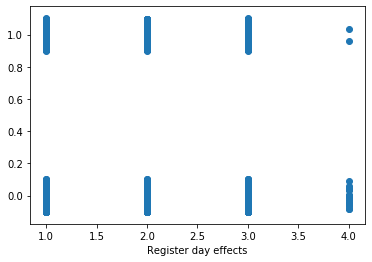

-----label 0---statics
mean 2.0317777777777777
min 1
max 4
0.75 quantile 3.0


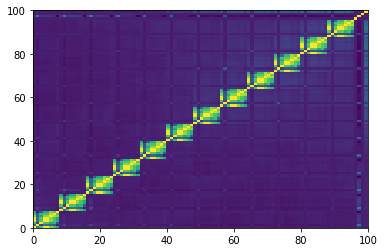

In [10]:
#数据集探索
match_data0=train_data.copy()
tempmatch=match_data0.copy()
endtime=pd.to_datetime('2020-01-01 00:00:00')##string to datetime
#print(endtime)
#天数怎样变成数据型的
tempmatch['djyear']=(((endtime-pd.to_datetime(
    tempmatch['djrq'])).map(lambda x: x.days))/365).astype('int')
test_data['djyear']=(((endtime-pd.to_datetime(
    test_data['djrq'])).map(lambda x: x.days))/365).astype('int')
print(tempmatch['djyear'].min())
print(tempmatch['djyear'].max())

from random import uniform
targetlabel=[]
for i in range(len(tempmatch)):
    if tempmatch['yc'][i]==0:
        targetlabel.append(0.0+uniform(-0.1,0.1))
    else:
        targetlabel.append(1.0+uniform(-0.1,0.1))
#plt.scatter(tempmatch['djyear'],tempmatch['yc'])
plt.scatter(tempmatch['djyear'],targetlabel)
plt.xlabel('Register day effects')
plt.show()

label=0
print('-----label %s---statics'%label)
print('mean %s'%tempmatch['djyear'][tempmatch['yc']==label].mean())
print('min %s'%tempmatch['djyear'][tempmatch['yc']==label].min())
print('max %s'%tempmatch['djyear'][tempmatch['yc']==label].max())
print('0.75 quantile %s'%tempmatch['djyear'][tempmatch['yc']==label].quantile(q=0.75))
'''
barWidth=0.3
# Choose the height of the blue bars
bars1=[len(tempmatch['yc'][tempmatch['djyear']==1]==0),
       len(tempmatch['yc'][tempmatch['djyear']==2]==0),
       len(tempmatch['yc'][tempmatch['djyear']==3]==0),
       len(tempmatch['yc'][tempmatch['djyear']==4]==0)]
# Choose the height of the cyan bars
bars2=[len(tempmatch['yc'][tempmatch['djyear']==1]==1),
       len(tempmatch['yc'][tempmatch['djyear']==2]==1),
       len(tempmatch['yc'][tempmatch['djyear']==3]==1),
       len(tempmatch['yc'][tempmatch['djyear']==4]==1)]
# The x position of bars
r1=np.arange(len(bars1))
r2=[x + barWidth for x in r1]
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black',capsize=7, label='0')
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='1')
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['1', '2', '3','4'])
plt.xlabel('Register years')
plt.legend()
# Show graphic
plt.show()
'''
##属性相关系数可视化
corMat=tempmatch.corr()
#print(tempmatch)
plt.pcolor(corMat)
plt.show()

In [11]:
##基准特征数据集选择
match_data=tempmatch.copy()
data1=match_data.drop(['bsrxmmp','bsrxm','djrq','fddbrxm','fdbrxmp','xzjd',
                       'jyfw','nsrmc','scjydz','hy','hydl','hyml','hyzl','zcdz','zjnsrsbh'], axis=1)
featurelist1=list(data1)## get a list of columns
featurelist1.insert(len(featurelist1),featurelist1.pop(featurelist1.index('yc')))
print(featurelist1)
data1 = data1.loc[:,featurelist1]
featurelist1=featurelist1[:-1]
mdata1 = data1.as_matrix()#DataFrame矩阵化
np.random.shuffle(mdata1)#打乱矩阵

['2017q1fphdsl', '2017q1jxje', '2017q1jxsl', '2017q1kpje', '2017q1kps', '2017q1kpse', '2017q1kpsl', '2017q1rkse', '2017q2fphdsl', '2017q2jxje', '2017q2jxsl', '2017q2kpje', '2017q2kps', '2017q2kpse', '2017q2kpsl', '2017q2rkse', '2017q3fphdsl', '2017q3jxje', '2017q3jxsl', '2017q3kpje', '2017q3kps', '2017q3kpse', '2017q3kpsl', '2017q3rkse', '2017q4fphdsl', '2017q4jxje', '2017q4jxsl', '2017q4kpje', '2017q4kps', '2017q4kpse', '2017q4kpsl', '2017q4rkse', '2018q1fphdsl', '2018q1jxje', '2018q1jxsl', '2018q1kpje', '2018q1kps', '2018q1kpse', '2018q1kpsl', '2018q1rkse', '2018q2fphdsl', '2018q2jxje', '2018q2jxsl', '2018q2kpje', '2018q2kps', '2018q2kpse', '2018q2kpsl', '2018q2rkse', '2018q3fphdsl', '2018q3jxje', '2018q3jxsl', '2018q3kpje', '2018q3kps', '2018q3kpse', '2018q3kpsl', '2018q3rkse', '2018q4fphdsl', '2018q4jxje', '2018q4jxsl', '2018q4kpje', '2018q4kps', '2018q4kpse', '2018q4kpsl', '2018q4rkse', '2019q1fphdsl', '2019q1jxje', '2019q1jxsl', '2019q1kpje', '2019q1kps', '2019q1kpse', '2019q1kps

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
def dataset_create(inputdata,p=0.9):
    X=inputdata[:, :-1]#特征X
    Y=inputdata[:, -1]#标签Y
    X=(X-X.min())/(X.max()-X.min())
    #X=(X-X.mean())/(X.std())
    X_train = X[: int(len(inputdata) * p), :]#训练集的X
    Y_train = Y[: int(len(inputdata) * p)]#训练集的标签
    X_test = X[int(len(inputdata) * p) : , : ]#测试集的X
    Y_test = Y[int(len(inputdata) * p) :  ]#测试集的标签
    return X_train,Y_train,X_test,Y_test

In [13]:
#####logistic model----------------
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import roc_auc_score, roc_curve,auc
from sklearn.metrics import classification_report
topk=-12#-12
%matplotlib inline
####----defining models-------
def submit_models(X_train,Y_train,X_test,Y_test,modelname='LR'):
    if modelname=='LR':
        #####-------logistic model----------------
        model = LR() #建立逻辑回归模型
        model.fit(X_train, Y_train) #用筛选后的特征数据训练模型
    else:
        if modelname=='SVM':
            #####SVM model----------------
            from sklearn import  svm
            #svc = svm.SVC(gamma=0.001, C=100,probability=True)
            svc = svm.SVC( C=0.1,probability=True)
            model = svc.fit(X_train, Y_train)
        else:
            if modelname=='RF':
                from sklearn.ensemble import RandomForestClassifier
                #--(620,entropy,1)--original feature
                #(370,entropy,4)--selected feature
                #(450,gini,1)-训练集2--original feature
                #(50,gini,1)-训练集2--selected feature
                #(630,gini,1)-训练集2--selected feature
                modelRF = RandomForestClassifier(n_estimators=630,#200,60,500
                                               criterion='gini',##entropy,gini
                                               max_features="sqrt",
                                               min_samples_leaf=1,#2,1,2
                                               n_jobs=4,random_state=14, )
                model=modelRF.fit(X_train, Y_train)
            else:
                if modelname=='BP':
                    #model=BPmodel(X_train,Y_train,X_test,Y_test,modelname)
                    #encoder = LabelEncoder()
                    #encoded_Y = encoder.fit_transform(Y_train)
                    #Y_train = np_utils.to_categorical(encoded_Y)
                    #encoded_Y = encoder.fit_transform(Y_test)
                    #Y_test = np_utils.to_categorical(encoded_Y)
                    model = Sequential()
                    model.add(Dense(input_dim =int(X_train.shape[1]), output_dim = 600))
                    model.add(Activation('relu'))
                    model.add(Dense(input_dim =600, output_dim = 180))
                    model.add(Activation('relu'))
                    model.add(Dense(input_dim =180, output_dim = 70))
                    model.add(Activation('relu'))
                    model.add(Dropout(0.2))
                    model.add(Dense(input_dim =70, output_dim = 15))
                    model.add(Activation('relu'))
                    model.add(Dense(input_dim = 15, output_dim = 1))
                    model.add(Activation('sigmoid'))
                    model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics=['accuracy'])
                    history=model.fit(X_train, Y_train,validation_split=0.3,nb_epoch = 50, batch_size = 128,verbose=0)
                    train_loss,score_train=model.evaluate(X_train, Y_train,batch_size=128)
                    test_loss,score_test=model.evaluate(X_test, Y_test,batch_size=128)
                    pred_train = model.predict_classes(X_train).reshape(len(Y_train))
                    pred_test = model.predict_classes(X_test).reshape(len(Y_test))
                    print(history.history.keys())
                    print(u'%s模型结束'%modelname)
                    print(u'模型训练集平均正确率为：%.3f' % score_train)
                    print(classification_report(Y_train, pred_train))
                    print(u'模型测试集平均正确率为：%.3f' % score_test)
                    print(classification_report(Y_test, pred_test))
                    # summarize history for accuracy
                    plt.plot(history.history['accuracy'])
                    plt.plot(history.history['val_accuracy'])
                    plt.title('model accuracy')
                    plt.ylabel('accuracy')
                    plt.xlabel('epoch')
                    plt.legend(['train', 'test'], loc='upper left')
                    plt.show()
                    # summarize history for loss
                    plt.plot(history.history['loss'])
                    plt.plot(history.history['val_loss'])
                    plt.title('model loss')
                    plt.ylabel('loss')
                    plt.xlabel('epoch')
                    plt.legend(['train', 'test'], loc='upper left')
                    plt.show()
                else:
                    from sklearn.ensemble import RandomForestClassifier
                    from sklearn.model_selection import GridSearchCV
                    parameter_space = {
                        "n_estimators": np.arange(50,650,10),
                        "criterion": ["gini", "entropy"],
                        "min_samples_leaf": [1,2, 4, 6],}
                    clf = RandomForestClassifier(random_state=14)
                    grid = GridSearchCV(clf, parameter_space, cv=5, scoring='roc_auc')
                    model = grid.fit(X_train, Y_train)
                    #model_best = grid.best_estimator_
                    print('---best_params_---%s'%model.best_params_)
    
    
    print(u'%s模型结束'%modelname)
    if modelname !='BP':
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        score_train=model.score(X_train, Y_train)
        score_test=model.score(X_test, Y_test)
        print(u'模型训练集平均正确率为：%.3f' % score_train)
        print(classification_report(Y_train, pred_train))
        print(u'模型测试集平均正确率为：%.3f' % score_test) #给出模型的平均正确率，本例为98.5%
        print(classification_report(Y_test, pred_test))
    return model,pred_train,pred_test
#导入自行编写的混淆矩阵可视化函数
def cm_plot(y, yp,title="confusion_matrix"):

  from sklearn.metrics import confusion_matrix #导入混淆矩阵函数

  cm = confusion_matrix(y, yp) #混淆矩阵
  
  import matplotlib.pyplot as plt #导入作图库

  plt.matshow(cm, cmap=plt.cm.Greens) #画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
  plt.colorbar() #颜色标签
  plt.title(title)
  for x in range(len(cm)): #数据标签
    for y in range(len(cm)):
      plt.annotate(cm[x,y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
      #plt.plot(cm[x, y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
  plt.xlabel('True label') #坐标轴标签
  plt.ylabel('Predicted label') #坐标轴标签
  return plt
####ROC Curve--------------
def roc_plot(Y_train,pred,Y_test,pred0,title='ROC Curve'):
    from sklearn.metrics import roc_auc_score, roc_curve,auc
    import matplotlib.pyplot as plt
    lw=2
    fpr, tpr, thresholds = roc_curve(Y_train, pred, pos_label=1)
    #print(fpr,tpr,thresholds)
    fpr0, tpr0, thresholds0 = roc_curve(Y_test, pred0, pos_label=1)
    roc_auc=auc(fpr,tpr)
    roc_auc0=auc(fpr0,tpr0)
    print("auc:",roc_auc)
    print("auc:",roc_auc0)
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='blue',
            lw=lw, label='ROC of %s_train(area = %0.4f)' % (title,roc_auc)) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot(fpr0, tpr0, color='red',
             lw=lw, linestyle='--', label='ROC of %s_test(area = %0.4f)' % (title,roc_auc0)) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC of %s'%title)
    plt.legend(loc="lower right")
    plt.show()

def multi_roc_plot(Y_LR,pred_LR,Y_SVM,pred_SVM,Y_RF,pred_RF,title,dataty):
    from sklearn.metrics import roc_auc_score, roc_curve,auc
    import matplotlib.pyplot as plt
    lw=2
    fpr, tpr, thresholds = roc_curve(Y_LR, pred_LR, pos_label=1)
    #print(fpr,tpr,thresholds)
    fpr0, tpr0, thresholds0 = roc_curve(Y_SVM, pred_SVM, pos_label=1)
    fpr1, tpr1, thresholds1 = roc_curve(Y_RF, pred_RF, pos_label=1)
    roc_auc=auc(fpr,tpr)
    roc_auc0=auc(fpr0,tpr0)
    roc_auc1=auc(fpr1,tpr1)
    print("LR auc:",roc_auc)
    print("SVM auc:",roc_auc0)
    print("RF auc:",roc_auc1)
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='blue',
            lw=lw, linestyle='--',label='ROC of LR_%s(area = %0.4f)' % (dataty,roc_auc)) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot(fpr0, tpr0, color='green',
             lw=lw, linestyle='--', label='ROC of SVM_%s(area = %0.4f)' % (dataty,roc_auc0)) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot(fpr1, tpr1, color='red',
             lw=lw, linestyle='--', label='ROC of RF_%s(area = %0.4f)' % (dataty,roc_auc1)) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('%s %s'%(dataty,title))
    plt.legend(loc="lower right")
    plt.show()
####feature importance plot--------------
def imp_plot(model,data):
    IMPfeature=model.feature_importances_
    IMPfeature=IMPfeature/IMPfeature.max()
    sorted_index=np.argsort(IMPfeature)
    print(sorted_index)
    print(IMPfeature[sorted_index])
    plt.bar(data.columns[sorted_index[topk:]],IMPfeature[sorted_index[topk:]])
    plt.xticks(rotation=45)
    plt.ylabel('Variable Importance')
    plt.show()
    topfeatures=list(data1.columns[sorted_index[topk:]])
    print('--top importance--%s'%topfeatures)
    return topfeatures

In [14]:
#随机产生测试集的答案，用于测试
def create_test_train_data(featurelist,modelname):
    prob = {
        "zjnsrsbh": train_data['zjnsrsbh'],
    }
    test_train_data = pd.DataFrame(prob)
    #val_data = match_data.drop(['cwrysjh','cwryxm','djkyrq','fddbrxm','frsjh','jdxz','jyfw','nsrmc','scjydz','xy','xydl','xyml','xyzl','zcdz','zjnsrsbh','yc'], axis=1)
    val_data = match_data[featurelist]
    mval = val_data.as_matrix()#DataFrame矩阵化
    mval=mval.astype(float)
    mval=(mval-mval.min())/(mval.max()-mval.min())##min-max normalization
    #mval=(mval-mval.mean())/(mval.std())##standard normalization
    #pred0 = model.predict(mval)
    if modelname=='BP':
        pred0 = model.predict_proba(mval)
    else:
        pred0 = model.predict_proba(mval)[:,1]
    test_train_data['Probability'] = pred0
    return test_train_data

#随机产生验证集的答案，用于测试
def create_verify_train_data(featurelist,modelname):
    #读取训练集的'zjnsrsbh'字段
    prob = {
        #"zjnsrsbh": val_data['zjnsrsbh'],
        "zjnsrsbh": test_data['zjnsrsbh'],
    }
    result_data = pd.DataFrame(prob)
    #val_data = train_data.drop(['cwrysjh','cwryxm','djkyrq','fddbrxm','frsjh','jdxz','jyfw','nsrmc',
                                #'scjydz','xy','xydl','xyml','xyzl','zcdz','zjnsrsbh'], axis=1)
    val_data = test_data[featurelist]
    mval = val_data.as_matrix()#DataFrame矩阵化
    mval=mval.astype(float)
    mval=(mval-mval.min())/(mval.max()-mval.min())##min-max normalization
    #mval=(mval-mval.mean())/(mval.std())##standard normalization
    #pred0 = model.predict(mval)
    if modelname=='BP':
        pred0 = model.predict_proba(mval)
    else:
        pred0 = model.predict_proba(mval)[:,1]
    result_data['Probability'] = pred0
    return result_data

In [15]:
##RF特征选择
#topfeatures=imp_plot(model,data1)
topfeatures=['2019q4jxje', '2019q3jxje', '2019q2jxje', '2019q1jxje', '2018q3jxje',
             '2018q1jxje', '2018q2jxje', '2018q4jxje', '2017q4jxje', '2017q1jxje',
             '2017q3jxje', '2017q2jxje']
featurelist2=topfeatures.copy()
topfeatures.append('yc')
data2=data1[topfeatures]
mdata2 = data2.as_matrix()#DataFrame矩阵化
np.random.shuffle(mdata2)#打乱矩阵
X_train,Y_train,X_test,Y_test=dataset_create(mdata2,0.8)#0.9

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=12, units=600)`
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=600, units=180)`
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=180, units=70)`
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=70, units=15)`
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=15, units=1)`
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


2000/2000 [==============================] - 0s 22us/step
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
BP模型结束
模型训练集平均正确率为：0.995
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      7193
         1.0       1.00      0.95      0.98       807

    accuracy                           1.00      8000
   macro avg       1.00      0.98      0.99      8000
weighted avg       1.00      1.00      1.00      8000

模型测试集平均正确率为：0.998
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1807
         1.0       1.00      0.97      0.99       193

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



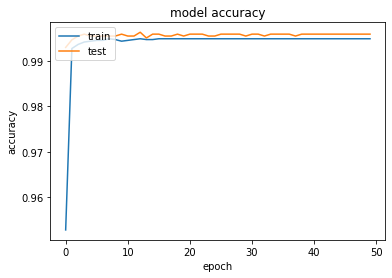

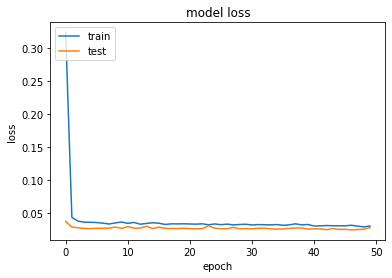

BP模型结束


In [16]:
#####筛选特征BP模型评估
models='BP'#'SVM'#'LR'
model,pred,pred0=submit_models(X_train,Y_train,X_test,Y_test,models)

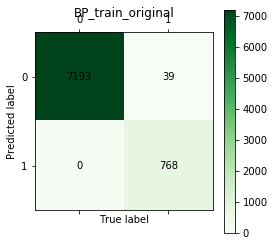

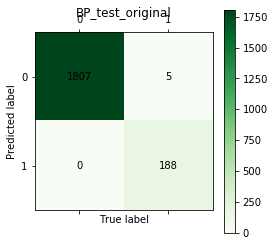

auc: 0.9964412771538348
auc: 0.9989620101447738


<Figure size 432x288 with 0 Axes>

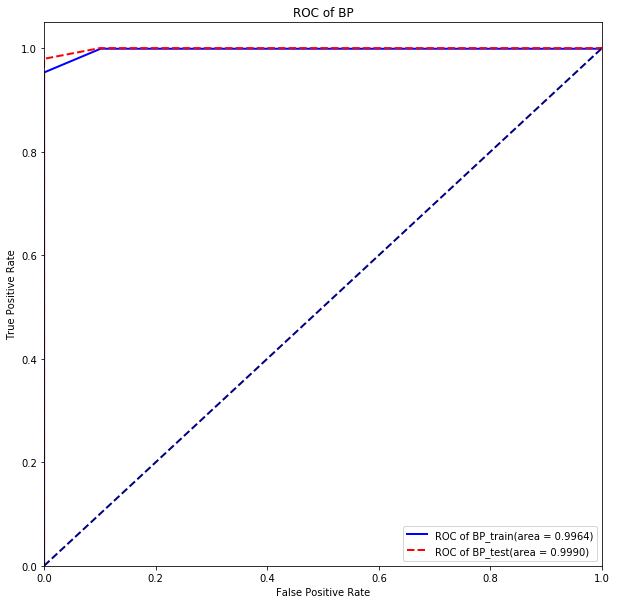

In [17]:
cm_plot(Y_train,pred,title="%s_train_original"%models).show() #显示混淆矩阵可视化结果
cm_plot(Y_test,pred0,title="%s_test_original"%models).show() #显示混淆矩阵可视化结果
pred_roc0 = model.predict_proba(X_test)#[:,1]
pred_roc = model.predict_proba(X_train)#[:,1]
roc_plot(Y_train,pred_roc,Y_test,pred_roc0,models)

In [18]:
#用测试集（训练集其中的1000条数据）来实现打分，传输自己的结果和测试集数据
#提交选手id，这一步必须先于模型训练之前，否则判断坐标
featurelist=featurelist2
modelname='BP'#'BP'
get_score.post_user_id('20')
user_test_data = create_test_train_data(featurelist,modelname)
'''
提交随机产生的答案和测试集数据，都是dataframe格式，两者有相同列'zjnsrsbh'，用于拼接
其中user_test_data只有两个字段'zjnsrsbh'和'Probability','Probability'中应为自己模型训练出的结果概率，
概率值应为[0,1]之间
返回结果：选手id，程序开始运行时间，程序结束运行时间，程序耗时，代码分，最终分（代码分和时间分）
测试集分数不参与打榜'''

get_score.post_test_data(user_test_data,train_data)
'''
#提交选手id，这一步必须先于模型训练之前
#用训练集所有的数据（9999）条来打分，只传输自己得出的结果
#其中user_verify_data只有两个字段'zjnsrsbh'和'Probability','Probability'中应为自己模型训练出的结果概率，
#概率值应为[0,1]之间'''
get_score.post_user_id('20')
user_verify_data = create_verify_train_data(featurelist,modelname)
# 提交验证集进行打榜
get_score.post_verify_data(user_verify_data)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


User-id:20
程序开始运行时间为：2019-12-20 23:22:25.913204
程序结束运行时间为：2019-12-20 23:22:26.259757
程序运行时间（去除打分耗时）为：0.346553
程序的准确率为：97.32445206
最终得分为：97.59200685


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


User-id:20
程序开始运行时间为：2019-12-20 23:22:26.304211
程序结束运行时间为：2019-12-20 23:22:26.533336
程序运行时间（去除打分耗时）为：0.229125
程序的准确率为：90.00623863
最终得分为：91.00561477
